In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import preprocessing
import category_encoders as ce
from math import exp
from math import pi
from math import pow



In [28]:
#datanew = df.to_csv(header=None,index = False)
new_data =  pd.read_csv("C:/Users/Puddi/Desktop/Masters_UTA/Masters_sem3/fall_2022/Machine_learning/Assignment-1/car_data/car.data", sep=",", header=None)
le = preprocessing.LabelEncoder()
newdata = new_data.apply(le.fit_transform)
newdata = newdata.astype(float)
newdata.iloc[:, -1] = newdata.iloc[:, -1].astype('int64')

newdata.dtypes

0    float64
1    float64
2    float64
3    float64
4    float64
5    float64
6      int64
dtype: object

C:\Users\Puddi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


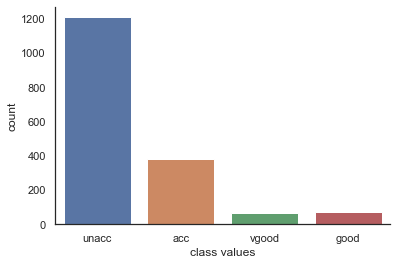

In [29]:
#Showing class values

my_data = new_data
my_data.columns = ["buying","maint","doors","persons","lug_boot","safety","class values"]
sns.set(style="white")
x = sns.countplot(my_data['class values'])
sns.despine()

<AxesSubplot:>

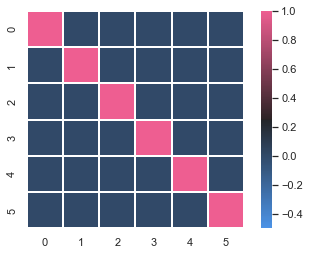

In [30]:
#checking if the given data is co-related because for naive bayes the data should not be co-related to each other

corr = newdata.iloc[:,:-1].corr(method="pearson")
cmap = sns.diverging_palette(250,354,80,60,center='dark',as_cmap=True)
sns.heatmap(corr, vmax=1, vmin=-.5, cmap=cmap, square=True, linewidths=.2) 

<AxesSubplot:xlabel='safety', ylabel='Count'>

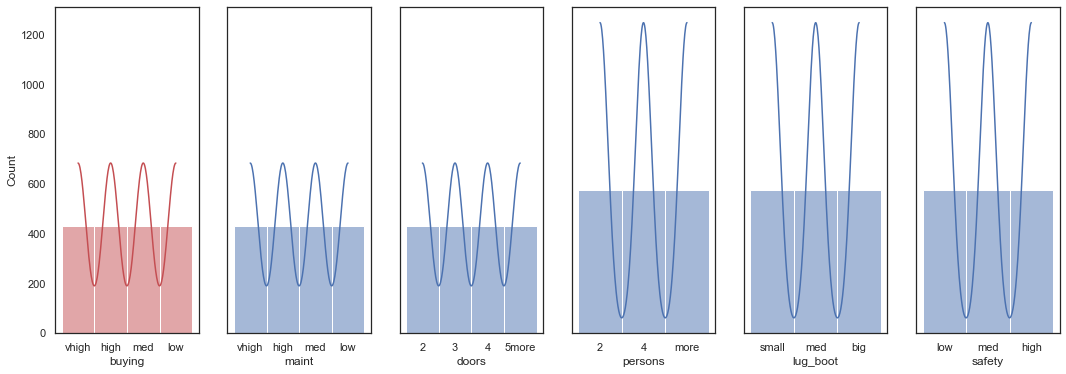

In [31]:
fig, axes = plt.subplots(1, 6, figsize=(18, 6), sharey=True)
sns.histplot(my_data, ax=axes[0], x="buying", kde=True, color='r')
sns.histplot(my_data, ax=axes[1], x="maint", kde=True, color='b')
sns.histplot(my_data, ax=axes[2], x="doors", kde=True)
sns.histplot(my_data, ax=axes[3], x="persons", kde=True)
sns.histplot(my_data, ax=axes[4], x="lug_boot", kde=True)
sns.histplot(my_data, ax=axes[5], x="safety", kde=True)

In [32]:
#converting string of values to a list
vals = newdata.values
df_data = vals.tolist()

#printing list of values of the dataset
df_data

[[3.0, 3.0, 0.0, 0.0, 2.0, 1.0, 2.0],
 [3.0, 3.0, 0.0, 0.0, 2.0, 2.0, 2.0],
 [3.0, 3.0, 0.0, 0.0, 2.0, 0.0, 2.0],
 [3.0, 3.0, 0.0, 0.0, 1.0, 1.0, 2.0],
 [3.0, 3.0, 0.0, 0.0, 1.0, 2.0, 2.0],
 [3.0, 3.0, 0.0, 0.0, 1.0, 0.0, 2.0],
 [3.0, 3.0, 0.0, 0.0, 0.0, 1.0, 2.0],
 [3.0, 3.0, 0.0, 0.0, 0.0, 2.0, 2.0],
 [3.0, 3.0, 0.0, 0.0, 0.0, 0.0, 2.0],
 [3.0, 3.0, 0.0, 1.0, 2.0, 1.0, 2.0],
 [3.0, 3.0, 0.0, 1.0, 2.0, 2.0, 2.0],
 [3.0, 3.0, 0.0, 1.0, 2.0, 0.0, 2.0],
 [3.0, 3.0, 0.0, 1.0, 1.0, 1.0, 2.0],
 [3.0, 3.0, 0.0, 1.0, 1.0, 2.0, 2.0],
 [3.0, 3.0, 0.0, 1.0, 1.0, 0.0, 2.0],
 [3.0, 3.0, 0.0, 1.0, 0.0, 1.0, 2.0],
 [3.0, 3.0, 0.0, 1.0, 0.0, 2.0, 2.0],
 [3.0, 3.0, 0.0, 1.0, 0.0, 0.0, 2.0],
 [3.0, 3.0, 0.0, 2.0, 2.0, 1.0, 2.0],
 [3.0, 3.0, 0.0, 2.0, 2.0, 2.0, 2.0],
 [3.0, 3.0, 0.0, 2.0, 2.0, 0.0, 2.0],
 [3.0, 3.0, 0.0, 2.0, 1.0, 1.0, 2.0],
 [3.0, 3.0, 0.0, 2.0, 1.0, 2.0, 2.0],
 [3.0, 3.0, 0.0, 2.0, 1.0, 0.0, 2.0],
 [3.0, 3.0, 0.0, 2.0, 0.0, 1.0, 2.0],
 [3.0, 3.0, 0.0, 2.0, 0.0, 2.0, 2.0],
 [3.0, 3.0, 

In [33]:
#checking for unique values and converting the class values of a list to an integer
class_values = [row[len(df_data[0])-1] for row in df_data]
unique = set(class_values)
checker = {}

for i, value in enumerate(unique, start=1):
    checker[value] = i
for row in df_data:
    row[len(df_data[0])-1] = checker[row[len(df_data[0])-1]]
df_data

[[3.0, 3.0, 0.0, 0.0, 2.0, 1.0, 3],
 [3.0, 3.0, 0.0, 0.0, 2.0, 2.0, 3],
 [3.0, 3.0, 0.0, 0.0, 2.0, 0.0, 3],
 [3.0, 3.0, 0.0, 0.0, 1.0, 1.0, 3],
 [3.0, 3.0, 0.0, 0.0, 1.0, 2.0, 3],
 [3.0, 3.0, 0.0, 0.0, 1.0, 0.0, 3],
 [3.0, 3.0, 0.0, 0.0, 0.0, 1.0, 3],
 [3.0, 3.0, 0.0, 0.0, 0.0, 2.0, 3],
 [3.0, 3.0, 0.0, 0.0, 0.0, 0.0, 3],
 [3.0, 3.0, 0.0, 1.0, 2.0, 1.0, 3],
 [3.0, 3.0, 0.0, 1.0, 2.0, 2.0, 3],
 [3.0, 3.0, 0.0, 1.0, 2.0, 0.0, 3],
 [3.0, 3.0, 0.0, 1.0, 1.0, 1.0, 3],
 [3.0, 3.0, 0.0, 1.0, 1.0, 2.0, 3],
 [3.0, 3.0, 0.0, 1.0, 1.0, 0.0, 3],
 [3.0, 3.0, 0.0, 1.0, 0.0, 1.0, 3],
 [3.0, 3.0, 0.0, 1.0, 0.0, 2.0, 3],
 [3.0, 3.0, 0.0, 1.0, 0.0, 0.0, 3],
 [3.0, 3.0, 0.0, 2.0, 2.0, 1.0, 3],
 [3.0, 3.0, 0.0, 2.0, 2.0, 2.0, 3],
 [3.0, 3.0, 0.0, 2.0, 2.0, 0.0, 3],
 [3.0, 3.0, 0.0, 2.0, 1.0, 1.0, 3],
 [3.0, 3.0, 0.0, 2.0, 1.0, 2.0, 3],
 [3.0, 3.0, 0.0, 2.0, 1.0, 0.0, 3],
 [3.0, 3.0, 0.0, 2.0, 0.0, 1.0, 3],
 [3.0, 3.0, 0.0, 2.0, 0.0, 2.0, 3],
 [3.0, 3.0, 0.0, 2.0, 0.0, 0.0, 3],
 [3.0, 3.0, 1.0, 0.0, 2.0, 1

In [34]:
#splitting the dataset by classes
def split_by_class(dataset):
    splitted = {}
    for i in range(len(dataset)):
        vector1 = dataset[i]
        if (vector1[-1] not in splitted):
            splitted[vector1[-1]] = []
        splitted[vector1[-1]].append(vector1)
    return splitted

In [35]:
#printing the values to check the split by class
splitclass = split_by_class(df_data)

for class_data in splitclass:
    print(class_data)
    for row in splitclass[class_data]:
        print(row)

3
[3.0, 3.0, 0.0, 0.0, 2.0, 1.0, 3]
[3.0, 3.0, 0.0, 0.0, 2.0, 2.0, 3]
[3.0, 3.0, 0.0, 0.0, 2.0, 0.0, 3]
[3.0, 3.0, 0.0, 0.0, 1.0, 1.0, 3]
[3.0, 3.0, 0.0, 0.0, 1.0, 2.0, 3]
[3.0, 3.0, 0.0, 0.0, 1.0, 0.0, 3]
[3.0, 3.0, 0.0, 0.0, 0.0, 1.0, 3]
[3.0, 3.0, 0.0, 0.0, 0.0, 2.0, 3]
[3.0, 3.0, 0.0, 0.0, 0.0, 0.0, 3]
[3.0, 3.0, 0.0, 1.0, 2.0, 1.0, 3]
[3.0, 3.0, 0.0, 1.0, 2.0, 2.0, 3]
[3.0, 3.0, 0.0, 1.0, 2.0, 0.0, 3]
[3.0, 3.0, 0.0, 1.0, 1.0, 1.0, 3]
[3.0, 3.0, 0.0, 1.0, 1.0, 2.0, 3]
[3.0, 3.0, 0.0, 1.0, 1.0, 0.0, 3]
[3.0, 3.0, 0.0, 1.0, 0.0, 1.0, 3]
[3.0, 3.0, 0.0, 1.0, 0.0, 2.0, 3]
[3.0, 3.0, 0.0, 1.0, 0.0, 0.0, 3]
[3.0, 3.0, 0.0, 2.0, 2.0, 1.0, 3]
[3.0, 3.0, 0.0, 2.0, 2.0, 2.0, 3]
[3.0, 3.0, 0.0, 2.0, 2.0, 0.0, 3]
[3.0, 3.0, 0.0, 2.0, 1.0, 1.0, 3]
[3.0, 3.0, 0.0, 2.0, 1.0, 2.0, 3]
[3.0, 3.0, 0.0, 2.0, 1.0, 0.0, 3]
[3.0, 3.0, 0.0, 2.0, 0.0, 1.0, 3]
[3.0, 3.0, 0.0, 2.0, 0.0, 2.0, 3]
[3.0, 3.0, 0.0, 2.0, 0.0, 0.0, 3]
[3.0, 3.0, 1.0, 0.0, 2.0, 1.0, 3]
[3.0, 3.0, 1.0, 0.0, 2.0, 2.0, 3]
[3.0, 3.0, 1

In [36]:
from math import sqrt

def mean(values):
    n = float(len(values))
    x = sum(values)
    sol = x / n
    return sol
def variance(values):
    n = len(values)
    avg = mean(values)
    dvtn = [(x-avg)**2 for x in values]
    var = sum(dvtn) / n
    vari = var + 1e-09
    return vari
def stdvn(values):
    var = variance(values)
    stdn = sqrt(var)    
    return stdn
def evaluations(dataset):
    evals = [(mean(column), stdvn(column), len(column)) for column in zip(*dataset)]
    del(evals[-1])
    return evals

In [37]:
splitclass = split_by_class(df_data)
summaries = dict()
for class_value, rows in splitclass.items():
    summaries[class_value] = evaluations(rows)
print(summaries)

{3: [(1.5487603305785125, 1.1739680334483478, 1210), (1.5570247933884298, 1.1665323659101274, 1210), (1.4545454545454546, 1.126686064795026, 1210), (0.7900826446280992, 0.8355138929091791, 1210), (1.0677685950413223, 0.8194147157437204, 1210), (1.0661157024793388, 0.7208298391676221, 1210)], 1: [(1.3932291666666667, 1.0844814383608887, 384), (1.4010416666666667, 1.0779991879699562, 384), (1.5859375, 1.0934988555520988, 384), (1.484375, 0.49975580074172227, 384), (0.8984375, 0.7988257379389763, 384), (0.9375, 0.9980449644179364, 384)], 4: [(1.4, 0.48989794957725646, 65), (1.2, 0.7483314780229413, 65), (1.7692307692307692, 1.0490909002447457, 65), (1.5384615384615385, 0.4985185162651149, 65), (0.38461538461538464, 0.48650425643825995, 65), (0.0, 3.1622776601683795e-05, 65)], 2: [(1.3333333333333333, 0.4714045218516916, 69), (1.3333333333333333, 0.4714045218516918, 69), (1.565217391304348, 1.0964800189706565, 69), (1.4782608695652173, 0.49952718765642734, 69), (0.9565217391304348, 0.80640

In [38]:
#calculating prior probabilities
def prior_prob(summaries, row):
    tot_rows = sum([summaries[label][0][2] for label in summaries])
    prob = {}
    for class_val, class_summ in summaries.items():
        prob[class_val] = summaries[class_val][0][2]/float(tot_rows)
    return prob

In [39]:
x = stdvn([3.0, 3.0, 0.0, 0.0, 2.0, 1.0])
x

1.2583057396091513

In [40]:
x = variance([3.0, 3.0, 0.0, 0.0, 2.0, 1.0])
x

1.5833333343333333

In [41]:
x = mean([3.0, 3.0, 0.0, 0.0, 2.0, 1.0])
x

1.5

In [42]:
xv = prior_prob(summaries, splitclass)
print(xv)

{3: 0.7002314814814815, 1: 0.2222222222222222, 4: 0.03761574074074074, 2: 0.03993055555555555}


In [43]:
#evaluating gaussian distribution function for a given value 
import math
def gaussian_(x, y, z):

    const = 1 / np.sqrt(z * 2 * np.pi)
    proba = np.exp(-0.5 * ((x - y) ** 2 / z)) 
    return const * proba


In [44]:
def cal_class_prob(summaries, row):
    prob_class = {}
    for class_val, class_sum in summaries.items():
        prob_class[class_val] = prior_prob(summaries, splitclass)
        for i in range(len(class_sum)):
            mean, stdvn, _ = class_sum[i]
            prob_class[class_val] = gaussian_(row[i], mean, stdvn)
            
    return prob_class

In [45]:
val = input("enter the row number(0 to 1727) for which you want to predict the class")
pb = cal_class_prob(summaries, df_data[int(val)])
print(pb)

enter the row number(0 to 1727) for which you want to predict the class10
{3: 0.2566048576231653, 1: 0.22683806837682854, 4: 0.0, 2: 0.2736300679466827}


In [46]:
#calculating the probability of predicting each class for a given row
for row in range(len(df_data)):    
    pb[row] = cal_class_prob(summaries, df_data[row])
print(pb)
#below output shows prediction of output of all rows in the dataset

{3: {3: 0.4684646818436866, 1: 0.39855211573785404, 4: 0.0, 2: 0.39723447965635944}, 1: {3: 0.2566048576231653, 1: 0.22683806837682854, 4: 0.0, 2: 0.2736300679466827}, 4: {3: 0.2566048576231653, 1: 0.22683806837682854, 4: 0.0, 2: 0.2736300679466827}, 2: {3: 0.21359764505417528, 1: 0.25710415261933095, 4: 70.94308430318422, 2: 0.21032620265880517}, 0: {3: 0.4684646818436866, 1: 0.39855211573785404, 4: 0.0, 2: 0.39723447965635944}, 5: {3: 0.21359764505417528, 1: 0.25710415261933095, 4: 70.94308430318422, 2: 0.21032620265880517}, 6: {3: 0.4684646818436866, 1: 0.39855211573785404, 4: 0.0, 2: 0.39723447965635944}, 7: {3: 0.2566048576231653, 1: 0.22683806837682854, 4: 0.0, 2: 0.2736300679466827}, 8: {3: 0.21359764505417528, 1: 0.25710415261933095, 4: 70.94308430318422, 2: 0.21032620265880517}, 9: {3: 0.4684646818436866, 1: 0.39855211573785404, 4: 0.0, 2: 0.39723447965635944}, 10: {3: 0.2566048576231653, 1: 0.22683806837682854, 4: 0.0, 2: 0.2736300679466827}, 11: {3: 0.21359764505417528, 1: 0

In [47]:
#splitting the dataset into n folds
def C_V_split(dataframe, tot_folds):
    length = int(len(dataframe)/10) #length of each fold
    folds = list()
    for i in range(tot_folds):
        folds += [dataframe[i*length:(i+1)*length]]
    #print(folds)
    folds += [dataframe[9*length:len(dataframe)]]
    return folds

In [48]:
#splitting the dataset into 10 folds
x = C_V_split(df_data, 10)
x

[[[3.0, 3.0, 0.0, 0.0, 2.0, 1.0, 3],
  [3.0, 3.0, 0.0, 0.0, 2.0, 2.0, 3],
  [3.0, 3.0, 0.0, 0.0, 2.0, 0.0, 3],
  [3.0, 3.0, 0.0, 0.0, 1.0, 1.0, 3],
  [3.0, 3.0, 0.0, 0.0, 1.0, 2.0, 3],
  [3.0, 3.0, 0.0, 0.0, 1.0, 0.0, 3],
  [3.0, 3.0, 0.0, 0.0, 0.0, 1.0, 3],
  [3.0, 3.0, 0.0, 0.0, 0.0, 2.0, 3],
  [3.0, 3.0, 0.0, 0.0, 0.0, 0.0, 3],
  [3.0, 3.0, 0.0, 1.0, 2.0, 1.0, 3],
  [3.0, 3.0, 0.0, 1.0, 2.0, 2.0, 3],
  [3.0, 3.0, 0.0, 1.0, 2.0, 0.0, 3],
  [3.0, 3.0, 0.0, 1.0, 1.0, 1.0, 3],
  [3.0, 3.0, 0.0, 1.0, 1.0, 2.0, 3],
  [3.0, 3.0, 0.0, 1.0, 1.0, 0.0, 3],
  [3.0, 3.0, 0.0, 1.0, 0.0, 1.0, 3],
  [3.0, 3.0, 0.0, 1.0, 0.0, 2.0, 3],
  [3.0, 3.0, 0.0, 1.0, 0.0, 0.0, 3],
  [3.0, 3.0, 0.0, 2.0, 2.0, 1.0, 3],
  [3.0, 3.0, 0.0, 2.0, 2.0, 2.0, 3],
  [3.0, 3.0, 0.0, 2.0, 2.0, 0.0, 3],
  [3.0, 3.0, 0.0, 2.0, 1.0, 1.0, 3],
  [3.0, 3.0, 0.0, 2.0, 1.0, 2.0, 3],
  [3.0, 3.0, 0.0, 2.0, 1.0, 0.0, 3],
  [3.0, 3.0, 0.0, 2.0, 0.0, 1.0, 3],
  [3.0, 3.0, 0.0, 2.0, 0.0, 2.0, 3],
  [3.0, 3.0, 0.0, 2.0, 0.0, 0.0, 3],
 

In [49]:
def naivebayes(dataset, tot_folds):
    folds = C_V_split(dataset, tot_folds)
    scores = list()
    for fold in folds:
        train_data = list(folds)
        train_data.remove(fold)
        train_data = sum(train_data, [])
        test_data = list()
        for row in fold:
            similar_row = list(row)
            test_data.append(similar_row)
            similar_row[-1] = None
        splitclass = split_by_class(train_data)
        summaries = dict()
        for class_value, rows in splitclass.items():
            summaries[class_value] = evaluations(rows)
        predictions = list()
        for row in test_data:
            probs = cal_class_prob(summaries, row)
            best_label, best_prob = None, -1
            for class_val, prob in probs.items():
                if best_label is None or prob > best_prob:
                    best_prob = prob
                    best_label = class_val                    
            predictions.append(best_label)      
        actual = [row[-1] for row in fold]
        accu_racy = calculated_accuracy(actual, predictions)
        scores.append(accu_racy)
    return scores

In [50]:
def calculated_accuracy(actual, predicted):
    accurate = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            accurate += 1
    return accurate / float(len(actual)) * 100.0

In [51]:
#providing number of folds required for k fold cross validation
tot_folds = 10
scores = naivebayes(df_data, tot_folds)
print('Accuracy of each 10-fold cross validation: %s' % scores)
print('weighted Mean Accuracy of the naive bayes model: %.3f%%' % (sum(scores)/float(len(scores))))

Accuracy of each 10-fold cross validation: [33.72093023255814, 33.13953488372093, 33.13953488372093, 33.72093023255814, 33.13953488372093, 33.13953488372093, 41.27906976744186, 48.25581395348838, 43.02325581395349, 59.30232558139535, 60.0]
weighted Mean Accuracy of the naive bayes model: 41.078%
